In [6]:
import pickle 
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
df=pickle.load(open('bigdata.pkl','rb'))

In [3]:
model_lstm = load_model('model_lstm.h5')

In [4]:
def Make_Tuple(res,output_lst):
    tuple_lst = list()
    for tup in range(len(res)):
        inner = res[tup]
        outer = output_lst[inner]
        tuple_lst.append([inner,outer])
        
    return tuple_lst
        

In [21]:
def Predict_Classes(number,N = 6):
    output_lst = model_lstm.predict([number])
    output_lst = list(output_lst[0])
  
    res = sorted(range(len(output_lst)), key = lambda sub: output_lst[sub])[-N:] 

    print("Indices list of max "+ str(N) +" elements is : " + str(res))
    
    result_tuples = Make_Tuple(res,output_lst)
    
    return result_tuples,res
    

In [7]:
def Plot_Graph(output):
    X_graph = list()
    y_graph = list()
    for i in range(len(output)):
        X_graph.append(output[i][0])
        y_graph.append(output[i][1])
        
    plt.scatter(X_graph,y_graph)
    plt.show()
        
    

The original list is : [0.027723083, 0.027143022, 0.026008489, 0.028039433, 0.024280299, 0.027679775, 0.028971154, 0.027819889, 0.025464343, 0.024828222, 0.0294661, 0.028448083, 0.026297651, 0.026990386, 0.027717987, 0.027343001, 0.027267901, 0.027635468, 0.025696162, 0.025672972, 0.027291272, 0.027966993, 0.027073955, 0.0277122, 0.024527349, 0.030159844, 0.027134866, 0.029330907, 0.02542518, 0.025768854, 0.025755601, 0.025831632, 0.028858742, 0.024525149, 0.028380688, 0.025449866, 0.028313458]
Indices list of max N elements is : [11, 32, 6, 27, 10, 25]


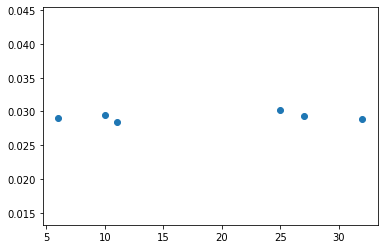

In [10]:
output,res = Predict_Classes(1)
Plot_Graph(output)

In [26]:
def Input_Here():
    number = int(input("Enter a Number: "))
    choice = input("You want to select the count of probablitic next number?\n*Default is 6*\nIf yes press Y else N: ").lower()
    if choice=='y':
        future_count = int(input("Count of top probability of next number: "))
        output,res = Predict_Classes(number,future_count)
    else:
        output,res = Predict_Classes(number)
    for i in range(len(output)):
        num =output[i][0]
        prob = output[i][1]*100
        print("Probability of "+str(num) + " is " + str(prob))
    return output

In [28]:
inp = Input_Here()

Enter a Number: 10
You want to select the count of probablitic next number?
*Default is 6*
If yes press Y else N: y
Count of top probability of next number: 10
Indices list of max 10 elements is : [20, 10, 36, 17, 11, 25, 6, 34, 27, 14]
Probability of 20 is 2.78624314814806
Probability of 10 is 2.8063595294952393
Probability of 36 is 2.8161952272057533
Probability of 17 is 2.818419225513935
Probability of 11 is 2.8194744139909744
Probability of 25 is 2.830706723034382
Probability of 6 is 2.832312695682049
Probability of 34 is 2.8402723371982574
Probability of 27 is 2.859283611178398
Probability of 14 is 2.934851311147213


In [35]:
def User_Input():
    cond = True
    while(cond):
        ch = input("Do you want to input?\nIf yes press Y else N: ").lower()
        if ch == 'y':
            Input_Here()
            cond = True
        elif ch == 'n':
            cond = False
        elif ch!= 'y':
            cond = False
           

In [37]:
User_Input()

Do you want to input?
If yes press Y else N: y
Enter a Number: 4
You want to select the count of probablitic next number?
*Default is 6*
If yes press Y else N: n
Indices list of max 6 elements is : [23, 34, 1, 6, 13, 17]
Probability of 23 is 2.97296866774559
Probability of 34 is 2.9828576371073723
Probability of 1 is 3.0270127579569817
Probability of 6 is 3.0992724001407623
Probability of 13 is 3.146277740597725
Probability of 17 is 3.467129170894623
Do you want to input?
If yes press Y else N: 2
